<a href="https://colab.research.google.com/github/Jessica-Emereuwa/Data_science_Project/blob/main/Heart_Disease_Risk_Predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# check for corrupt and nan values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#**The names of column**
1. age
2. sex(1 = MALE, 0 = FEMALE)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar > 120 mg/dl(1 = TRUE, 0 = FALSE)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina(1 = YES, 0 = NO)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. Target (1 or 0)

In [5]:
# check value data type
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [6]:
df['target'].value_counts()

,count
target,
1,526
0,499


#**CLEANING DATA - MISSING VALUES**

In [8]:
df['cp'].value_counts()

,count
cp,
0,497
2,284
1,167
3,77


In [9]:
df['ca'].value_counts()

,count
ca,
0,578
1,226
2,134
3,69
4,18


In [10]:
df['thal'].value_counts()

,count
thal,
2,544
3,410
1,64
0,7


#**DEALING WITH MISSING DATA**

In [13]:
df.shape

(1025, 14)

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: xlabel='sex', ylabel='count'>

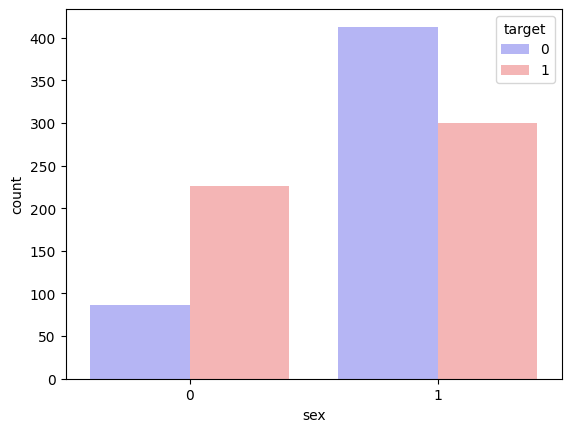

In [15]:
sns.countplot(x='sex', hue='target',data=df, palette='bwr')

#**EXPLORE THE DATA(EXPLORATORY DATA ANALYSIS)**


In [18]:
# Descriptive statistics
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


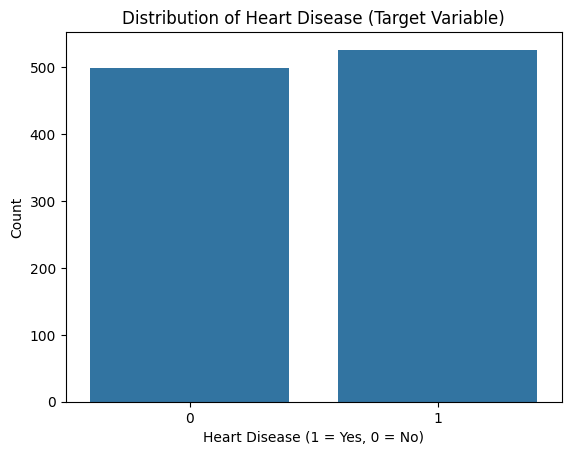

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='sex', ylabel='count'>

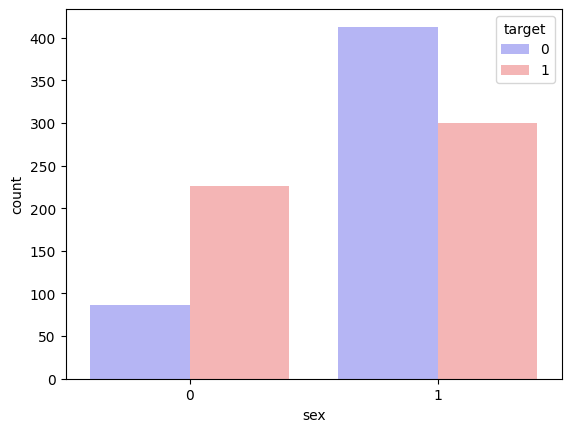

In [17]:
sns.countplot(x='sex', hue='target',data=df, palette='bwr')

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

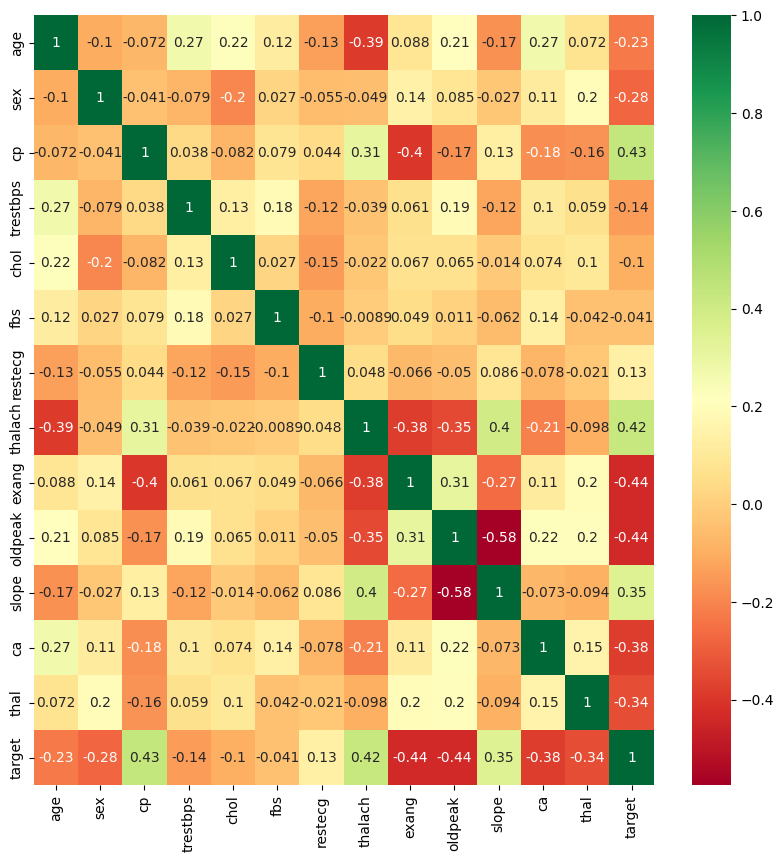

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

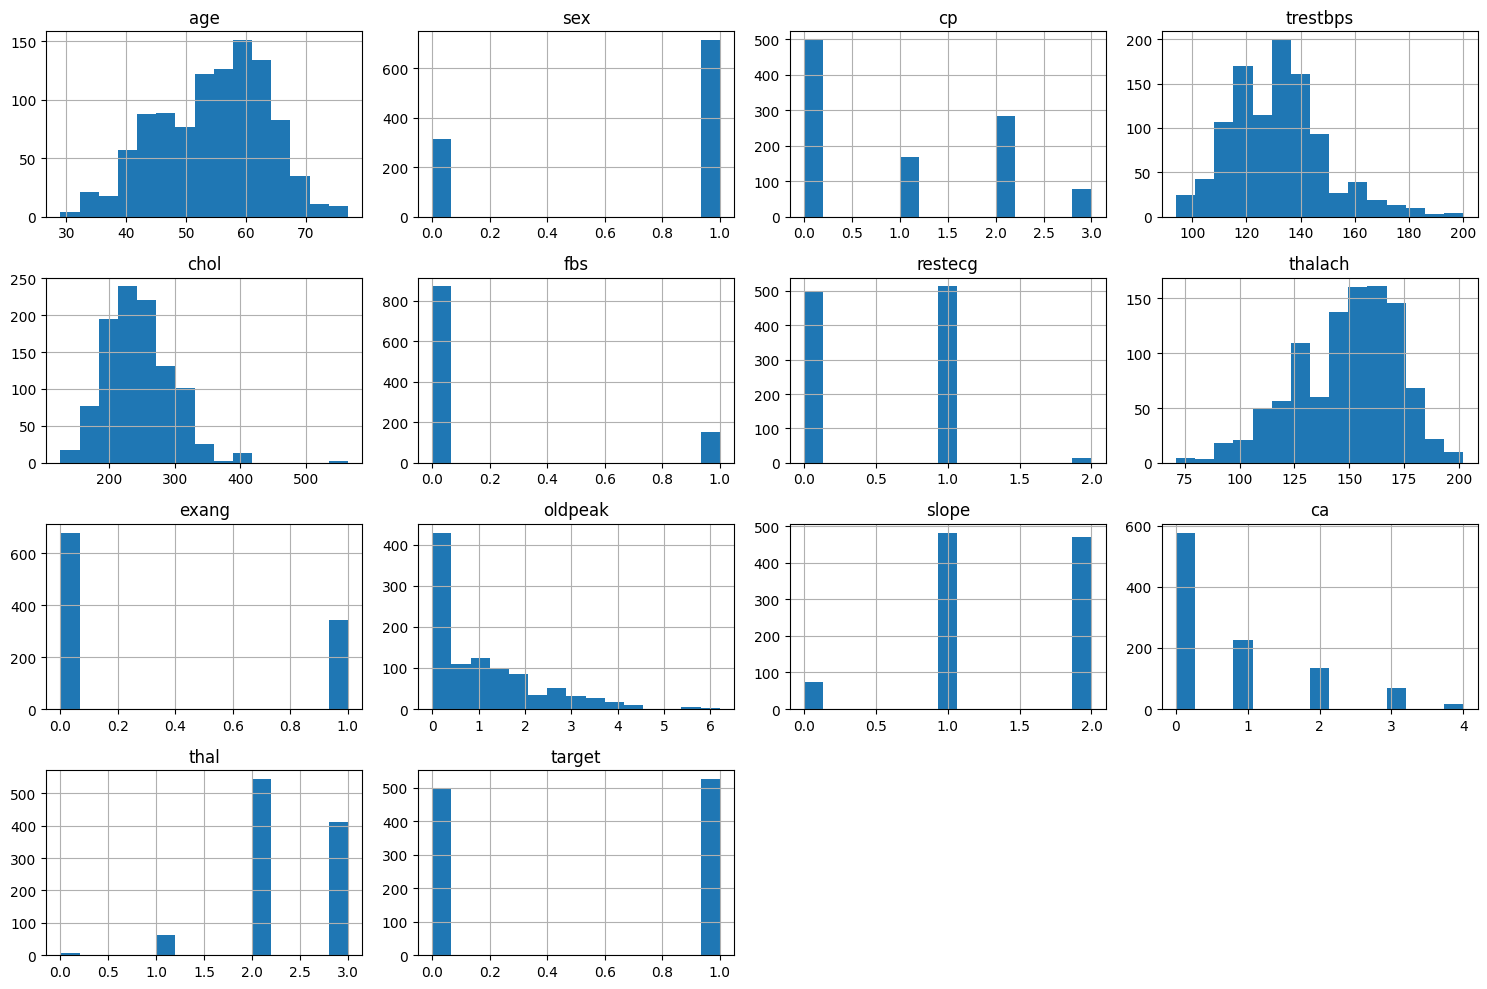

In [21]:
# Histograms for numerical features
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


#**FEATURE SELECTION**

In [22]:
# Define features and target variable
X = df.drop('target', axis=1)  # Features
y = df['target']                # Target variable


In [23]:
X.shape

(1025, 13)

In [24]:
y.value_counts()

,count
target,
1,526
0,499


#Normalization/Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

# Normalize continuous variables
scaler = StandardScaler()
X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])


**Train-Test Split**

In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Selection and Training**

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Make Predictions**


In [29]:
# Make predictions
y_pred = model.predict(X_train1)


**Evaluate Model Performance**

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
print("Accuracy:", accuracy_score(y_train1, y_pred))
print("Classification Report:\n", classification_report(y_train1, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train1, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       423

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820

Confusion Matrix:
 [[397   0]
 [  0 423]]


In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

smote = SMOTE(random_state=0)

# Use X_train and y_train for SMOTE
# The error was caused by using the wrong variables here.
# It should be X_train1 and y_train1
x_train_smote, y_train_smote = smote.fit_resample(X_train1, y_train1)

# Train the model with the resampled data
model = LogisticRegression(class_weight='balanced', random_state=0)
model.fit(x_train_smote, y_train_smote)

# Predict on the test data
y_pred = model.predict(X_test)

print("After SMOTE")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

After SMOTE
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       102
           1       0.77      0.86      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



In [32]:
import pickle

In [33]:
with open('HEART DISEASE.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

#**DEPLOYMENT USING STREAMLITE**

In [34]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00


#**The names of column**
1. age
2. sex(1 = MALE, 0 = FEMALE)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar > 120 mg/dl(1 = TRUE, 0 = FALSE)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina(1 = YES, 0 = NO)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. Target (1 or 0)

In [38]:
%%writefile app.py

import pickle
import streamlit as st
import numpy as np
import pandas as pd

# Title of the application
st.title('Heart Disease Prediction')

# Load the trained machine learning model
def load_model():
    with open('HEART DISEASE.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    return model

model = load_model()

# Define mappings for categorical features based on the encoding used during training
sex_mapping = {'Female': 0, 'Male': 1}
chest_pain_type_mapping = {'ATA(Atypical Angina)': 0, 'NAP(Non-Anginal Pain)': 1, 'ASY(Asymptomatic)': 2, 'TA(Typical Angina)': 3}
fasting_blood_sugar_mapping = {'False': 0, 'True': 1}
resting_electrocardiographic_results_mapping = {'Normal': 0, 'ST: having ST-T wave abnormality': 1, "LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria": 2}
exercise_induced_angina_mapping = {'No': 0, 'Yes': 1}
slope_mapping = {'Upsloping': 0, 'Flat': 1, 'Downsloping': 2}
thal_mapping = {'Normal': 0, 'Fixed Defect': 1, 'Reversable Defect': 2}

# Input fields for each feature
age = st.number_input('Age', min_value=1, max_value=120, value=30)
sex = st.selectbox('Sex', options=list(sex_mapping.keys()))
cp = st.selectbox('Chest Pain Type', options=list(chest_pain_type_mapping.keys()))
trestbps = st.number_input('Resting Blood Pressure', min_value=50, max_value=200, value=120)
chol = st.number_input('Serum Cholesterol in mg/dl', min_value=100, max_value=600, value=200)
fbs = st.selectbox('Fasting Blood Sugar > 120 mg/dl', options=list(fasting_blood_sugar_mapping.keys()))
restecg = st.selectbox('Resting Electrocardiographic Results', options=list(resting_electrocardiographic_results_mapping.keys()))
thalach = st.number_input('Maximum Heart Rate Achieved', min_value=50, max_value=220, value=150)
exang = st.selectbox('Exercise Induced Angina', options=list(exercise_induced_angina_mapping.keys()))
oldpeak = st.number_input('Oldpeak (ST depression induced by exercise)', min_value=0.0, max_value=6.0, value=1.0)
slope = st.selectbox('Slope of the Peak Exercise ST Segment', options=list(slope_mapping.keys()))
ca = st.number_input('Number of Major Vessels Colored by Fluoroscopy (0-4)', min_value=0, max_value=4, value=0)
thal = st.selectbox('Thalassemia', options=list(thal_mapping.keys()))

# Button to make predictions
if st.button('Predict'):
    # Prepare the input data for prediction
    input_data = [
        age,
        sex_mapping[sex],
        chest_pain_type_mapping[cp],
        trestbps,
        chol,
        fasting_blood_sugar_mapping[fbs],
        resting_electrocardiographic_results_mapping[restecg],
        thalach,
        exercise_induced_angina_mapping[exang],
        oldpeak,
        slope_mapping[slope],
        ca,
        thal_mapping[thal]
    ]

    # Convert input data to numpy array for prediction
    input_array = np.array(input_data).reshape(1, -1)

    # Make prediction
    prediction = model.predict(input_array)

    # Display prediction result
    if prediction[0] == 1:
        st.success('Heart Disease Detected')
    else:
        st.success('No Heart Disease Detected')


Overwriting app.py


In [39]:
!npm install localtunnel


up to date, audited 23 packages in 561ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501 & curl -s ipv4.icanhazip.com

34.90.18.230



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.18.230:8501

your url is: https://soft-beans-clap.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
